In [1]:
#!pip install tensorflow

In [15]:
#Importing the Libraries
import pandas as pd
import numpy as np
#import tensorflow as tf
%matplotlib inline
import matplotlib. pyplot as plt
import matplotlib
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib. dates as mandates
from sklearn import linear_model
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras.utils import plot_model

In [17]:
#Get the Dataset
df=pd.read_csv("MSFT.csv",na_values=['null'],index_col='Date',parse_dates=True,infer_datetime_format=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061378,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063570,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064667,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063022,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061926,47894400


<AxesSubplot:xlabel='Date'>

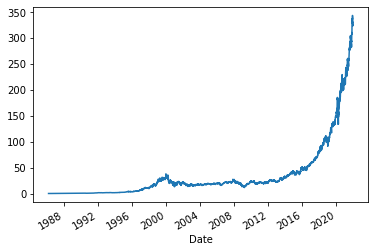

In [25]:
#Plot the True Adj Close Value
df['Adj Close'].plot()

In [27]:
#Setting the Target Variable and Selecting the Features

#Set Target Variable
output_var = pd.DataFrame(df['Adj Close'])
#Selecting the Features
features = ['Open', 'High', 'Low', 'Volume']

#Scaling
scaler = MinMaxScaler()
feature_transform = scaler.fit_transform(df[features])
feature_transform= pd.DataFrame(columns=features, data=feature_transform, index=df.index)
feature_transform.head()

,Open,High,Low,Volume
Date,,,,
1986-03-13,0.000000,0.000027,0.000000,1.000000
1986-03-14,0.000025,0.000030,0.000025,0.297096
1986-03-17,0.000035,0.000032,0.000036,0.127119
1986-03-18,0.000040,0.000032,0.000030,0.063588
1986-03-19,0.000033,0.000025,0.000025,0.044285


In [28]:
#Creating a Training Set and a Test Set for Stock Market Prediction

#Splitting to Training set and Test set
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(feature_transform):
        X_train, X_test = feature_transform[:len(train_index)], feature_transform[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = output_var[:len(train_index)].values.ravel(), output_var[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [29]:
#Data Processing For LSTM

#Process the data for LSTM
trainX =np.array(X_train)
testX =np.array(X_test)
X_train = trainX.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = testX.reshape(X_test.shape[0], 1, X_test.shape[1])

In [32]:
#Building the LSTM Model for Stock Market Prediction
!pip install pydot
#Building the LSTM Model
lstm = Sequential()
lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')
plot_model(lstm, show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [41]:
#Model Training
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100

1024/1024 [==============================] - 6s 3ms/step - loss: 23.2263
Epoch 2/100
1024/1024 [==============================] - 3s 3ms/step - loss: 165.1490
Epoch 3/100
1024/1024 [==============================] - 3s 3ms/step - loss: 80.1236
Epoch 4/100
1024/1024 [==============================] - 2s 2ms/step - loss: 33.5595
Epoch 5/100
1024/1024 [==============================] - 2s 2ms/step - loss: 10.7873
Epoch 6/100
1024/1024 [==============================] - 2s 2ms/step - loss: 3.2861
Epoch 7/100
1024/1024 [==============================] - 2s 2ms/step - loss: 1.5404
Epoch 8/100
1024/1024 [==============================] - 3s 3ms/step - loss: 1.0089
Epoch 9/100
1024/1024 [==============================] - 3s 3ms/step - loss: 0.7650
Epoch 10/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.6467
Epoch 11/100
1024/1024 [==============================] - 2s 2ms/step - loss: 0.5945
Epoch 12/100
1024/1024 [==============================] - 2s 2ms/st

In [38]:
#LSTM Prediction
y_pred= lstm.predict(X_test)

26/26 [==============================] - 4s 3ms/step


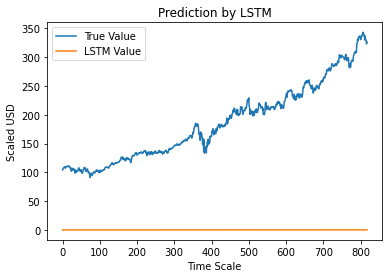

In [40]:
#Predicted vs True Adj Close Value – LSTM
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='LSTM Value')
plt.title("Prediction by LSTM")
plt.xlabel('Time Scale')
plt.ylabel('Scaled USD')
plt.legend()
plt.show()